In [2]:
import pandas as pd
import numpy as np  # Importing numpy library for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import seaborn as sns  # Importing seaborn library for statistical plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("C:/Users/84869/DATA ANALYST/DATA/Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#đọc biến phân loại
categorical_vars = df.select_dtypes(include=['category', 'object']).columns.tolist()
print(categorical_vars)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [7]:
#List categorical number
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_numeric_vars = [col for col in numeric_columns if df[col].nunique() < 10]
print(categorical_numeric_vars)

['bedrooms', 'bathrooms', 'stories', 'parking']


In [8]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

In [9]:
# Chọn cột cần xem giá trị duy nhất
selected_column = 'furnishingstatus'

# Hiển thị các giá trị duy nhất trong cột được chọn
unique_values = df[selected_column].unique()
print(f"Unique values in '{selected_column}':")
for value in unique_values:
    print(value)

Unique values in 'furnishingstatus':
furnished
semi-furnished
unfurnished


In [11]:
for col in df.columns:
    unique_vals = df[col].unique()
    if len(unique_vals) < 10:
        print(f"Unique values in {col}: {unique_vals}")

Unique values in bedrooms: [4 3 5 2 6 1]
Unique values in bathrooms: [2 4 1 3]
Unique values in stories: [3 4 2 1]
Unique values in mainroad: ['yes' 'no']
Unique values in guestroom: ['no' 'yes']
Unique values in basement: ['no' 'yes']
Unique values in hotwaterheating: ['no' 'yes']
Unique values in airconditioning: ['yes' 'no']
Unique values in parking: [2 3 0 1]
Unique values in prefarea: ['yes' 'no']
Unique values in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [12]:
# Kiểm tra phạm vi của biến "price"
price_range = df['price'].describe()
print("Range of the variable 'price':")
print(price_range[['min', 'max']])

Range of the variable 'price':
min     1750000.0
max    13300000.0
Name: price, dtype: float64


In [13]:
df['price'] = df['price'] / 10000
print(df['price'])

0      1330.000
1      1225.000
2      1225.000
3      1221.500
4      1141.000
         ...   
540     182.000
541     176.715
542     175.000
543     175.000
544     175.000
Name: price, Length: 545, dtype: float64


In [14]:
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()
print("Missing values:\n", missing_values)
print("\nNumber of duplicates:", duplicates)

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Number of duplicates: 0


In [16]:
np.random.seed(42)  
missing_indices = np.random.choice(df.index, 5, replace=False)
df.loc[missing_indices, 'price'] = np.nan

print(df.loc[missing_indices, 'price'])

316   NaN
77    NaN
360   NaN
90    NaN
493   NaN
Name: price, dtype: float64


In [19]:
# Cập nhật 5 giá trị ngẫu nhiên thành giá trị thiếu (NaN) trong cột "price"
df.loc[missing_indices, 'price'] = np.nan

# In ra 5 dòng có giá trị thiếu mới
print("5 rows with randomly generated missing values for 'price':")
print(df.loc[missing_indices, 'price'])
df.info()
df.isnull().sum()

5 rows with randomly generated missing values for 'price':
316   NaN
77    NaN
360   NaN
90    NaN
493   NaN
Name: price, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             540 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage:

price               5
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [20]:
# Hiển thị các hàng chứa giá trị missing
missing_rows = df[df.isnull().any(axis=1)]

# Hiển thị các hàng chứa giá trị thiếu
print("Các hàng có giá trị missing:")
print(missing_rows)

Các hàng có giá trị missing:
     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
77     NaN  6500         3          2        3      yes        no       no   
90     NaN  5000         3          1        2      yes        no       no   
316    NaN  5900         4          2        2       no        no      yes   
360    NaN  4040         2          1        1      yes        no       no   
493    NaN  3960         3          1        1      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
77               no             yes        0      yes        furnished  
90               no             yes        0       no   semi-furnished  
316              no              no        1       no      unfurnished  
360              no              no        0       no   semi-furnished  
493              no              no        0       no        furnished  


In [21]:
mean_price = df['price'].mean()

# Thay thế các giá trị thiếu trong cột "price" bằng giá trị trung bình
df['price'].fillna(mean_price, inplace=True)

# Hiển thị thông tin sau khi thay thế giá trị thiếu
print("Data after replacing missing values with mean:")
print(df)

Data after replacing missing values with mean:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    1330.000  7420         4          2        3      yes        no       no   
1    1225.000  8960         4          4        4      yes        no       no   
2    1225.000  9960         3          2        2      yes        no      yes   
3    1221.500  7500         4          2        2      yes        no      yes   
4    1141.000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   182.000  3000         2          1        1      yes        no      yes   
541   176.715  2400         3          1        1       no        no       no   
542   175.000  3620         2          1        1      yes        no       no   
543   175.000  2910         3          1        1       no        no       no   
544   175.000  3850         3          1        2      yes    

In [22]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
print(outliers)

     price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   1330.0   7420         4          2        3      yes        no       no   
1   1225.0   8960         4          4        4      yes        no       no   
2   1225.0   9960         3          2        2      yes        no      yes   
3   1221.5   7500         4          2        2      yes        no      yes   
4   1141.0   7420         4          1        2      yes       yes      yes   
5   1085.0   7500         3          3        1      yes        no      yes   
6   1015.0   8580         4          3        4      yes        no       no   
7   1015.0  16200         5          3        2      yes        no       no   
8    987.0   8100         4          1        2      yes       yes      yes   
9    980.0   5750         3          2        4      yes       yes       no   
10   980.0  13200         3          1        2      yes        no      yes   
11   968.1   6000         4          3        2     

In [23]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Xác định giới hạn dưới và giới hạn trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm các giá trị ngoại lệ
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("Các giá trị ngoại lệ trong biến 'price':")
print(outliers)

Các giá trị ngoại lệ trong biến 'price':
     price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   1330.0   7420         4          2        3      yes        no       no   
1   1225.0   8960         4          4        4      yes        no       no   
2   1225.0   9960         3          2        2      yes        no      yes   
3   1221.5   7500         4          2        2      yes        no      yes   
4   1141.0   7420         4          1        2      yes       yes      yes   
5   1085.0   7500         3          3        1      yes        no      yes   
6   1015.0   8580         4          3        4      yes        no       no   
7   1015.0  16200         5          3        2      yes        no       no   
8    987.0   8100         4          1        2      yes       yes      yes   
9    980.0   5750         3          2        4      yes       yes       no   
10   980.0  13200         3          1        2      yes        no      yes   
11   968.1 

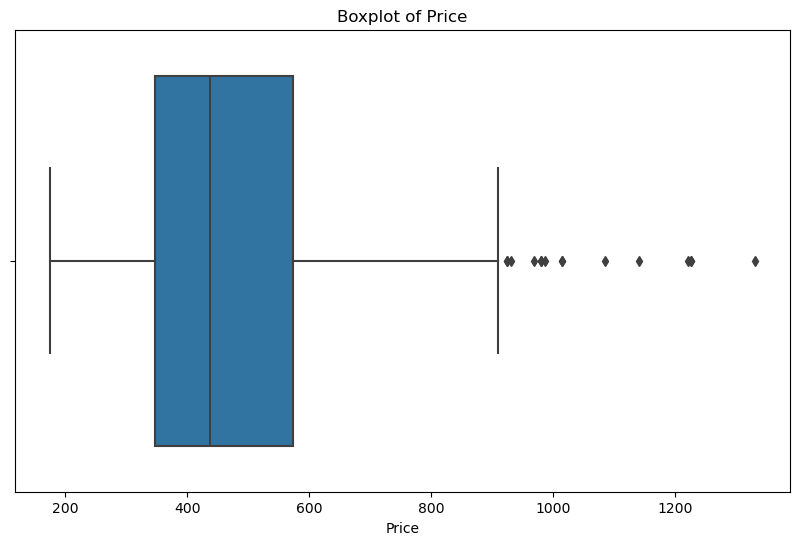

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [25]:
df['price_zscore'] = (df['price'] - df['price'].mean()) / df['price'].std()

# Xác định các outlier dựa trên z-score
outliers = df[(df['price_zscore'] > 3) | (df['price_zscore'] < -3)]

# Thay thế outlier bằng giá trị trung bình của cột "price"
mean_price = df['price'].mean()
df.loc[outliers.index, 'price'] = mean_price

# In ra các dòng chứa outlier trước khi thay thế
print("Outliers before replacing with mean:")
print(outliers)

# Hiển thị thông tin sau khi thay thế outlier
print("\nData after replacing outliers with mean:")
print(df)

Outliers before replacing with mean:
    price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  1330.0  7420         4          2        3      yes        no       no   
1  1225.0  8960         4          4        4      yes        no       no   
2  1225.0  9960         3          2        2      yes        no      yes   
3  1221.5  7500         4          2        2      yes        no      yes   
4  1141.0  7420         4          1        2      yes       yes      yes   
5  1085.0  7500         3          3        1      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furn

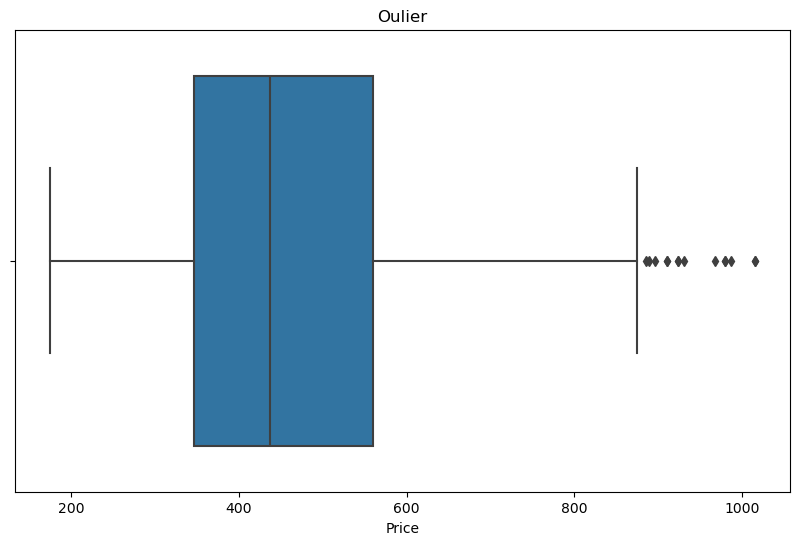

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Oulier')
plt.xlabel('Price')
plt.show()

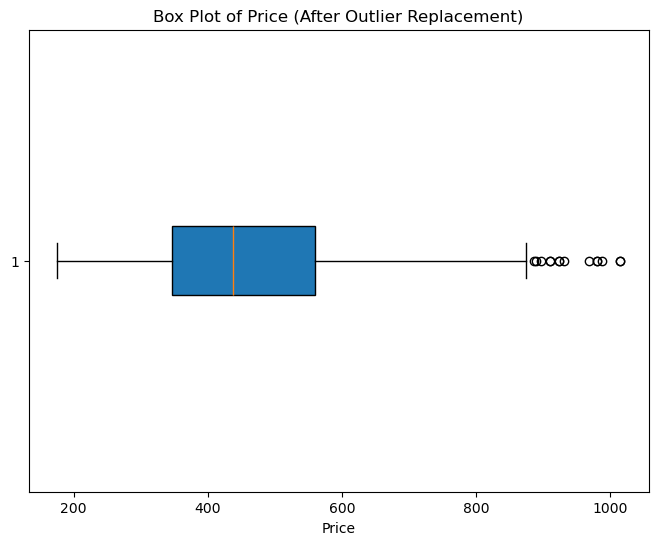

In [27]:
# Assuming you've already run the code to replace outliers

plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True)  # Use the 'price' column (now with replaced values)
plt.title('Box Plot of Price (After Outlier Replacement)')
plt.xlabel('Price')
plt.show()

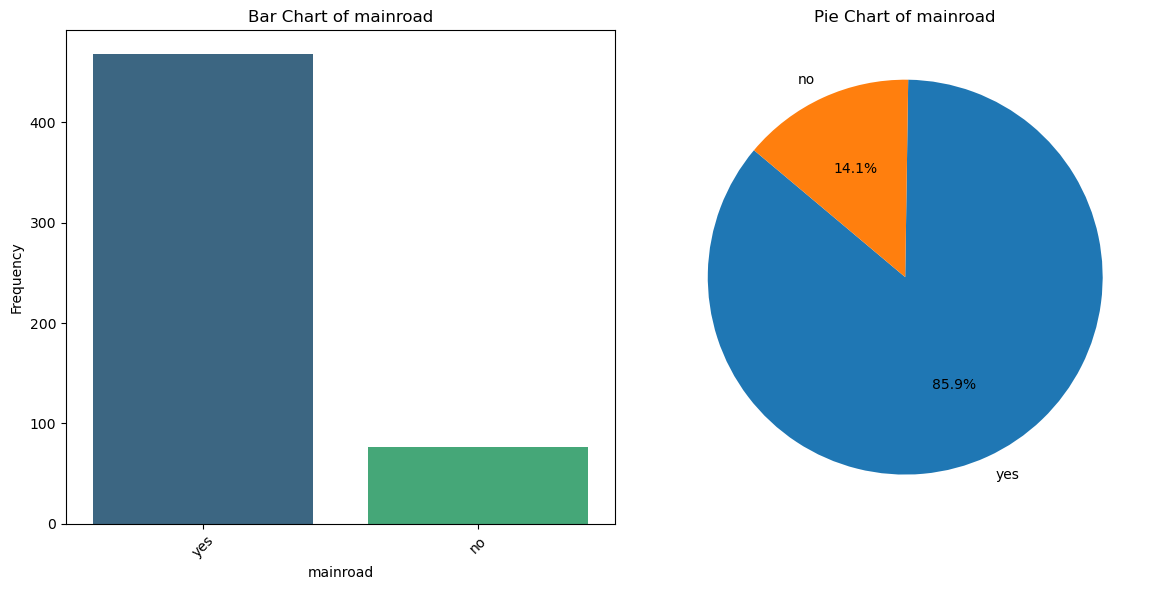

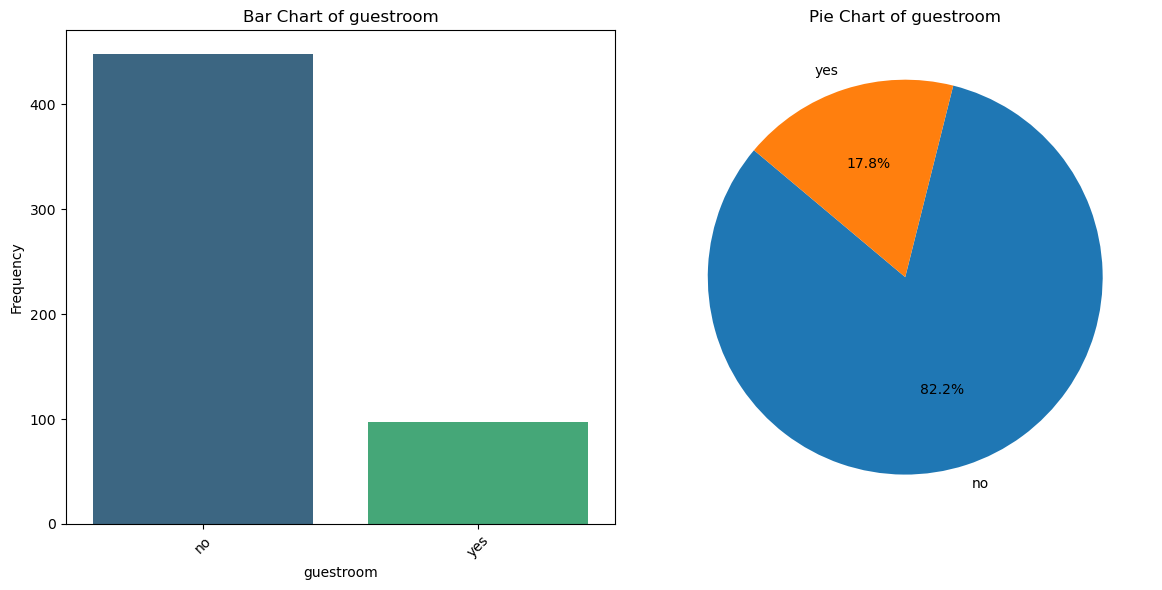

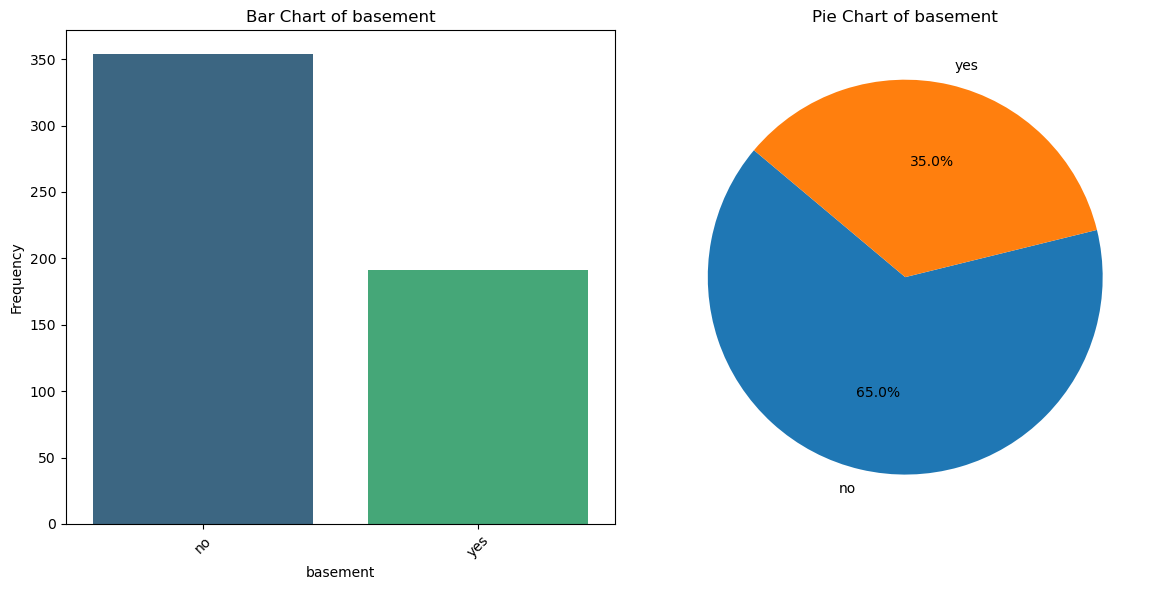

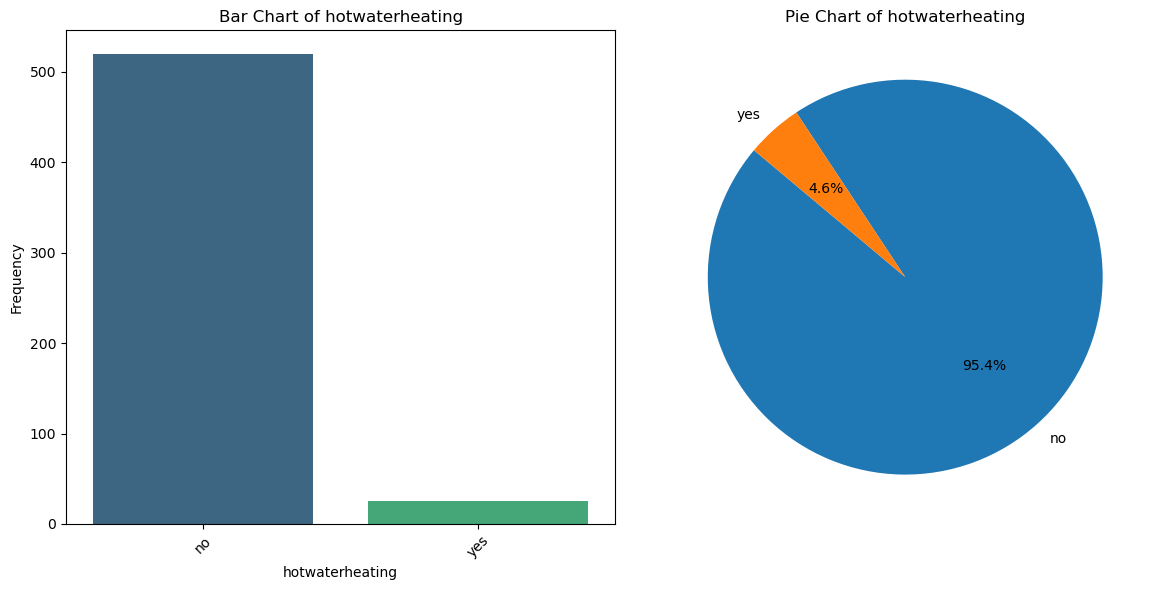

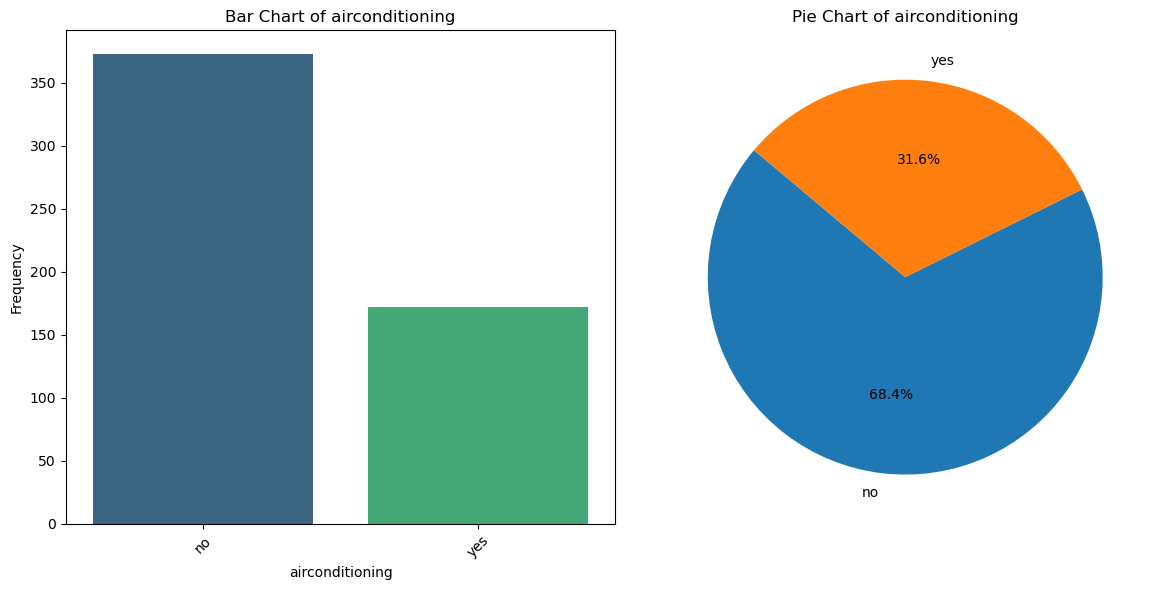

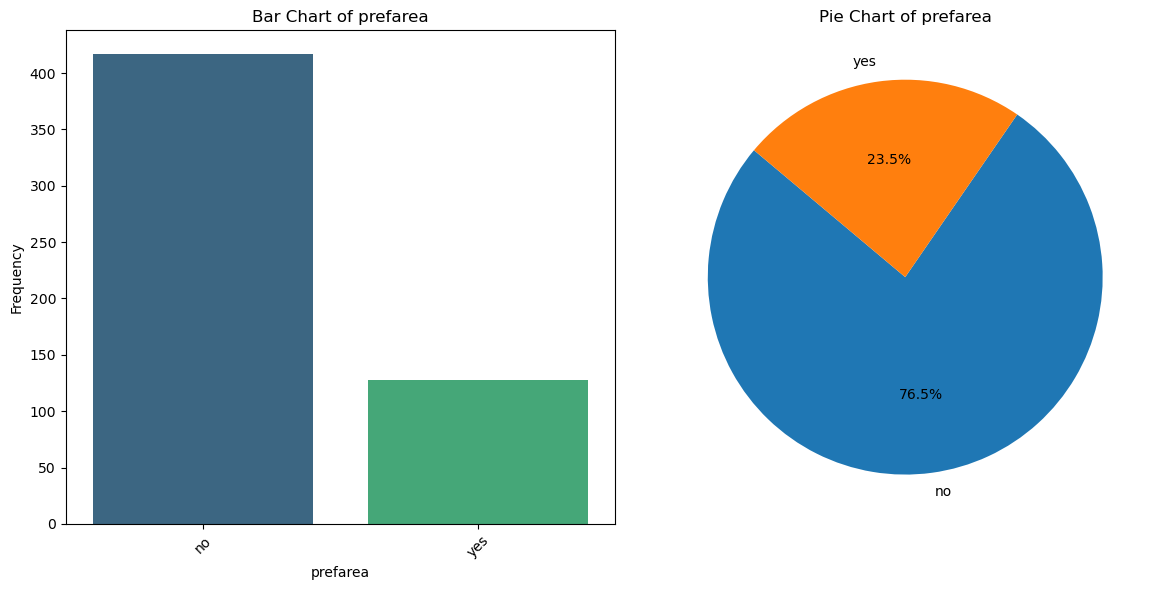

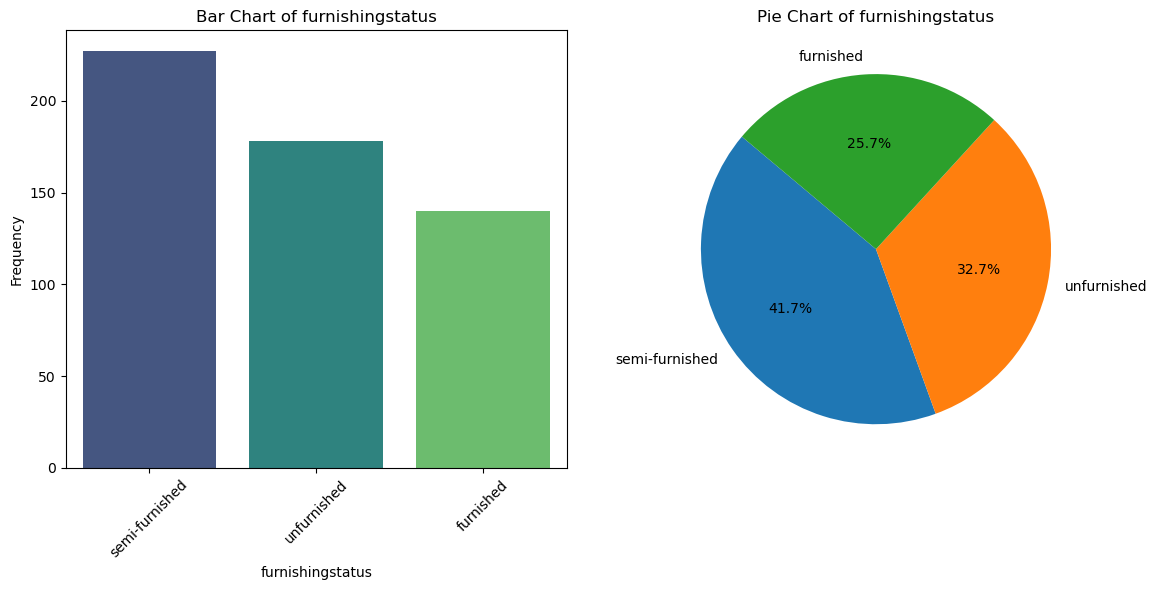

In [28]:
import matplotlib.pyplot as plt

# Danh sách các cột phân loại
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    # Thống kê số lượng
    counts = df[col].value_counts()
    
    # Vẽ Bar Chart
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # Một hàng, hai cột, biểu đồ đầu tiên
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Vẽ Pie Chart
    plt.subplot(1, 2, 2)  # Một hàng, hai cột, biểu đồ thứ hai
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    
    plt.tight_layout()
    plt.show()

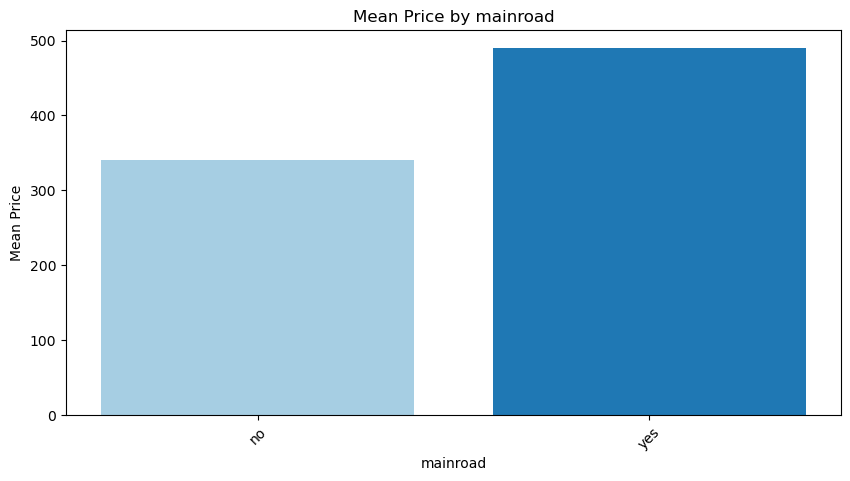

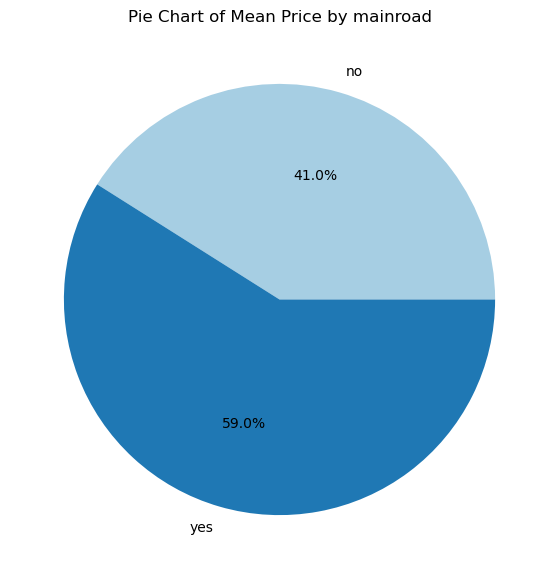

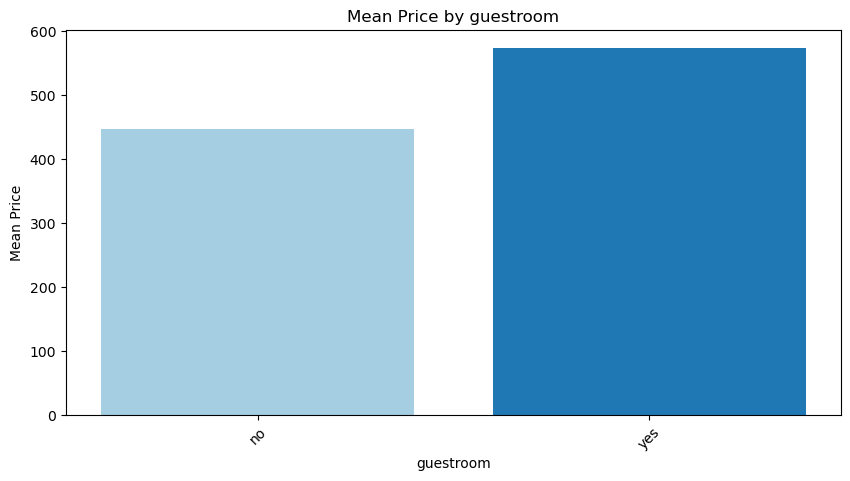

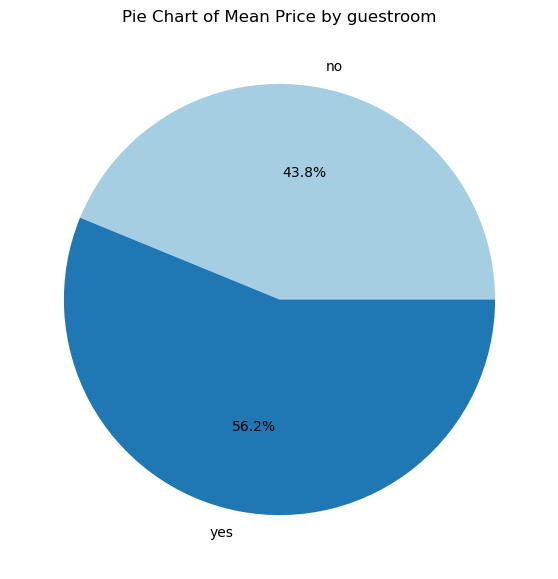

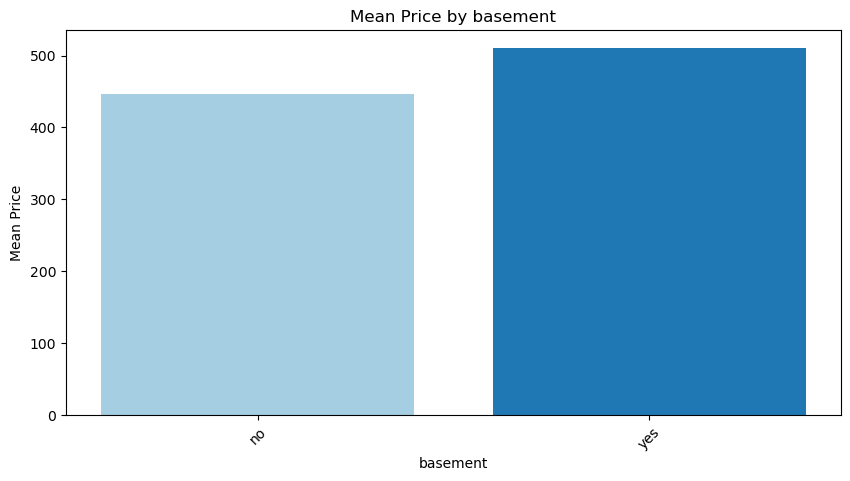

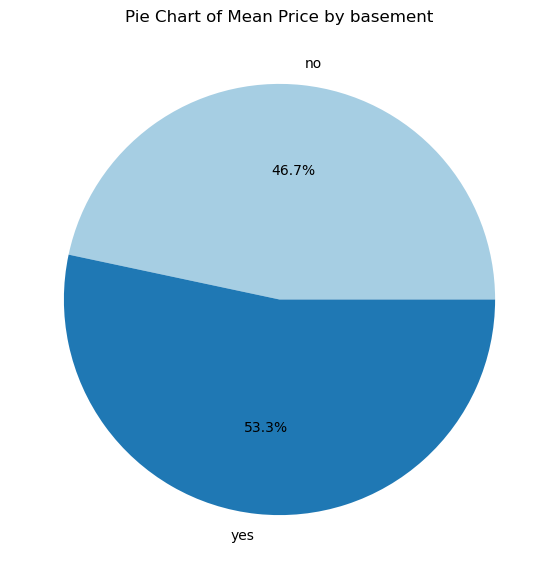

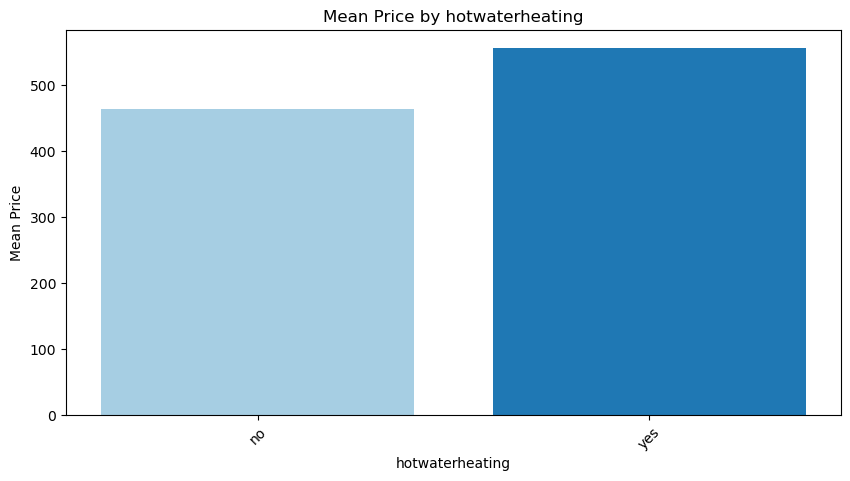

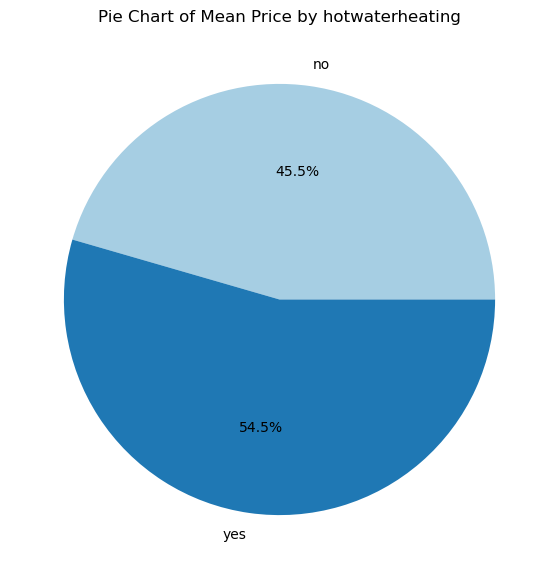

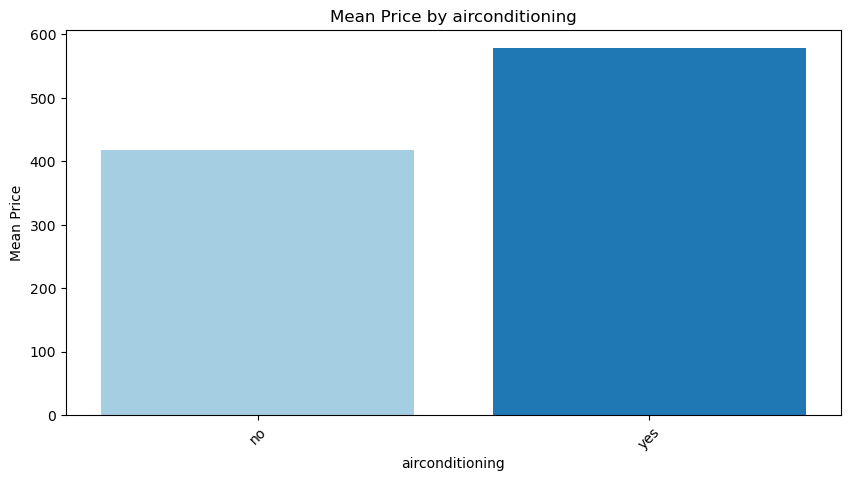

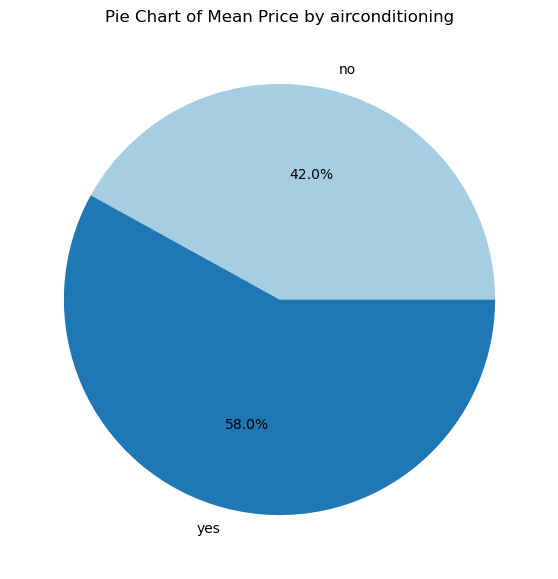

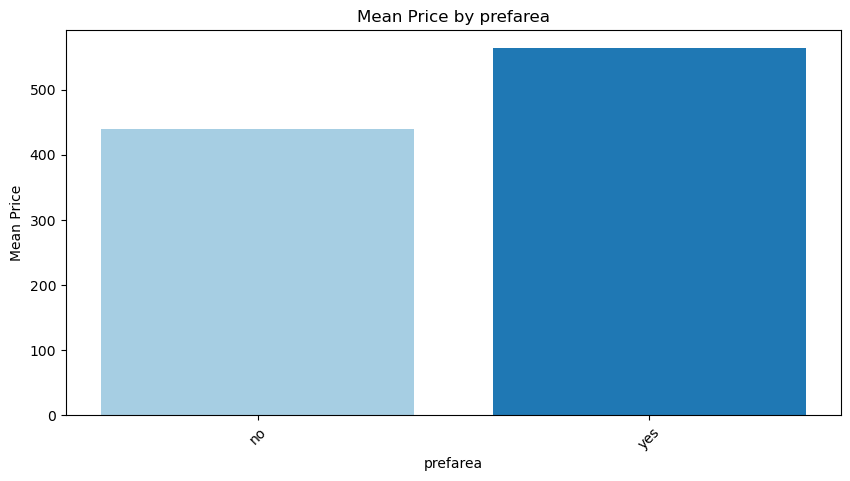

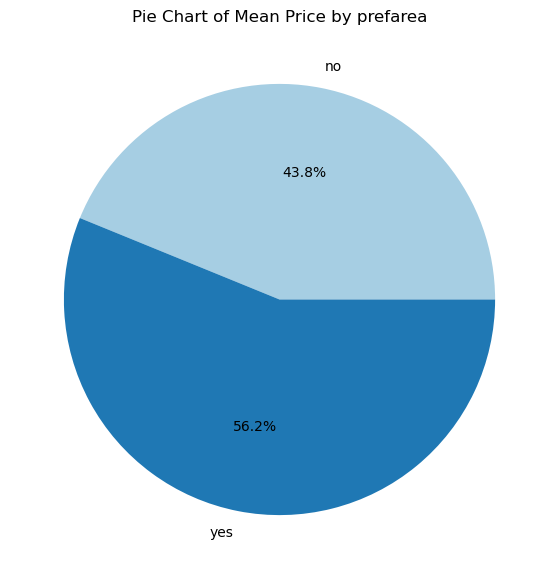

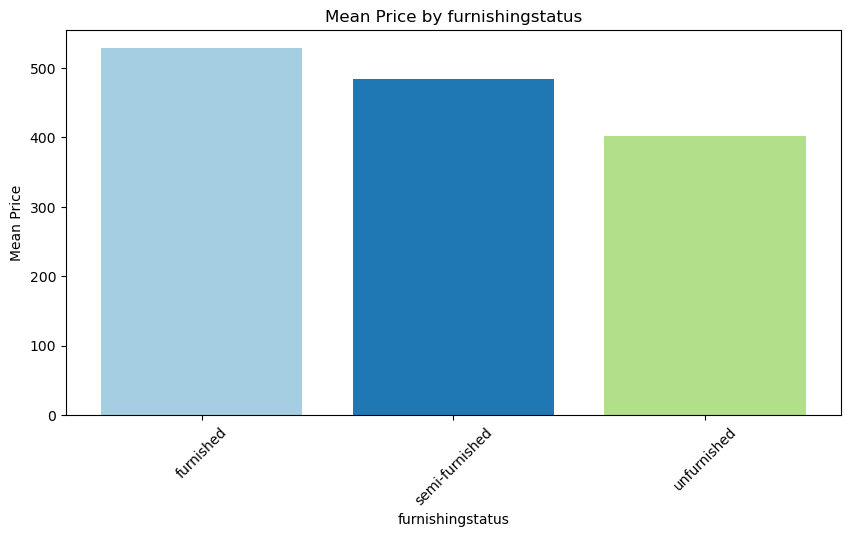

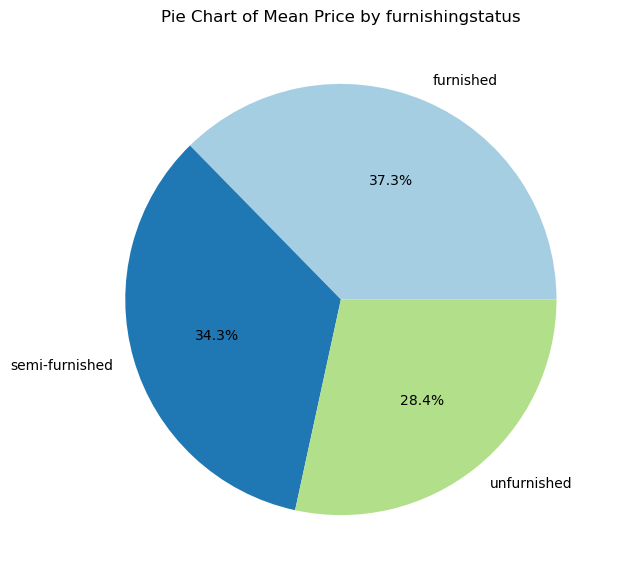

In [29]:
# Thống kê và vẽ biểu đồ của từng biến phân loại với biến price
# Liệt kê các cột phân loại (categorical variables)
categorical_columns = df.select_dtypes(include=['object']).columns

# Thống kê và vẽ biểu đồ cho từng biến phân loại với biến 'price'
for col in categorical_columns:
    # Tính toán giá trị trung bình của 'price' cho từng giá trị của biến phân loại
    price_stats = df.groupby(col)['price'].mean().reset_index()

    # Vẽ Bar chart cho giá trị trung bình của 'price'
    plt.figure(figsize=(10, 5))
    plt.bar(price_stats[col], price_stats['price'], color=plt.cm.Paired.colors)
    plt.title(f'Mean Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.show()

    # Nếu muốn thêm Pie chart cho giá trị trung bình
    plt.figure(figsize=(7, 7))
    plt.pie(price_stats['price'], labels=price_stats[col], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart of Mean Price by {col}')
    plt.show()

C:\Users\84869\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


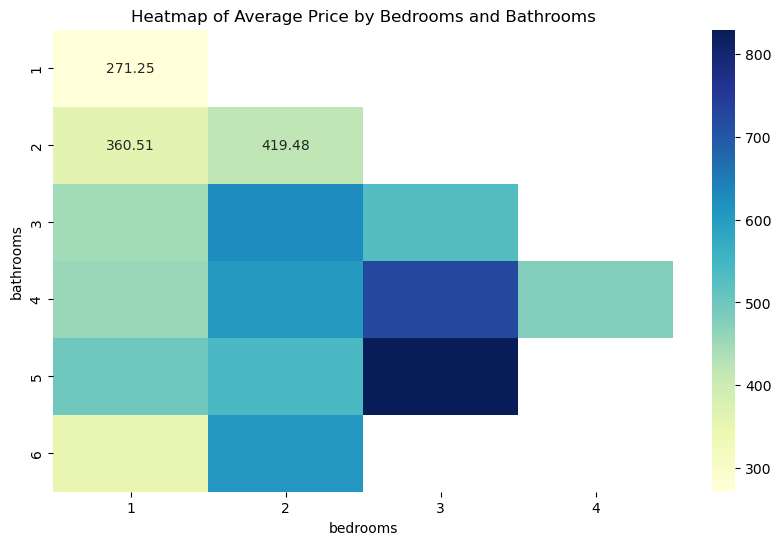

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

var1 = 'bedrooms'
var2 = 'bathrooms'

# Tính trung bình của price theo từng nhóm của 2 biến phân loại
heatmap_data = df.groupby([var1, var2])['price'].mean().unstack()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Average Price by Bedrooms and Bathrooms')
plt.ylabel(var2)
plt.xlabel(var1)
plt.show()

C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


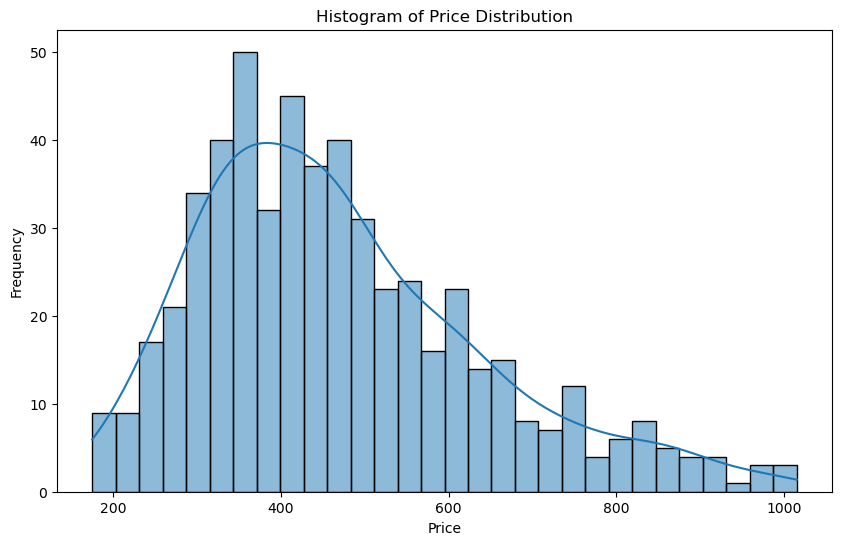

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Histogram of Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

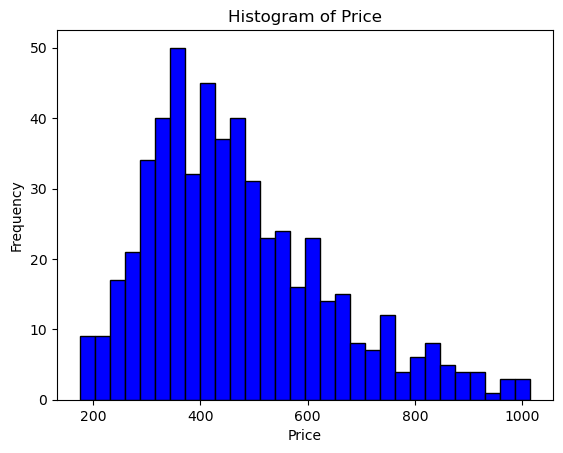

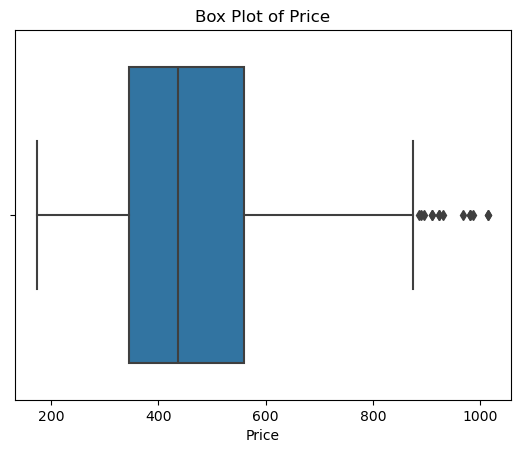

C:\Users\84869\AppData\Local\Temp\ipykernel_7008\1019201122.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)
C:\Users\84869\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


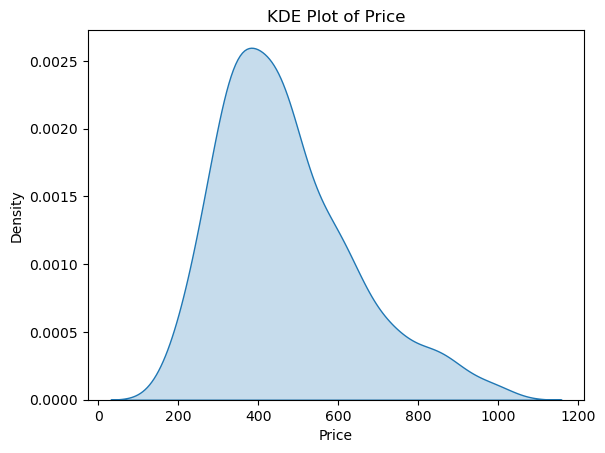

In [33]:
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

import seaborn as sns

sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

sns.kdeplot(df['price'], shade=True)
plt.title('KDE Plot of Price')
plt.xlabel('Price')
plt.show()

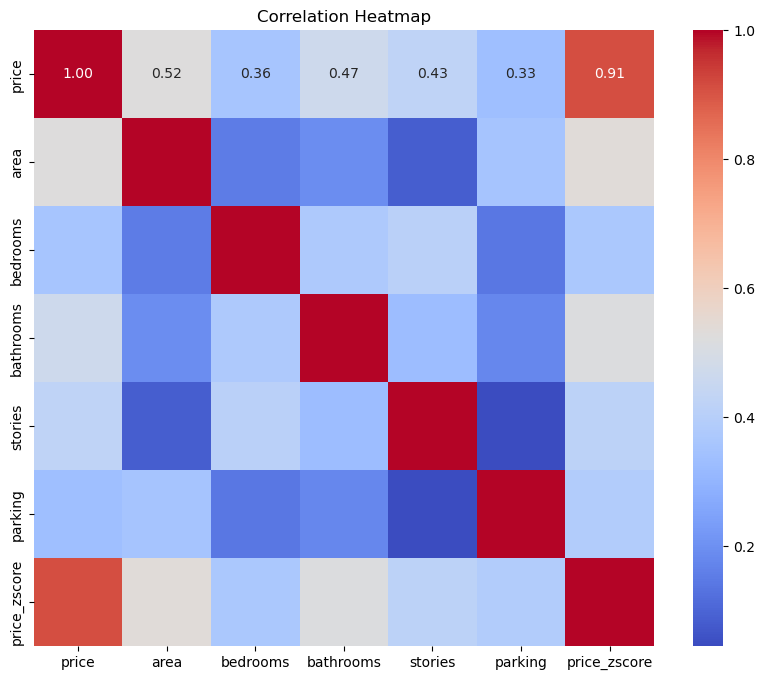

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các cột chứa dữ liệu dạng số
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Tạo DataFrame mới chỉ chứa các cột dạng số
df_numeric = df[numeric_cols]

# Tạo ma trận tương quan
corr = df_numeric.corr()

# Vẽ biểu đồ heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# ma  trận tương quan của cả biến liên tục và phân loại
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_new = df.copy()

le = LabelEncoder()

for column in df_new.columns:
  if df_new[column].dtype == object:
    df_new[column] = le.fit_transform(df_new[column])

# Tính toán ma trận tương quan
correlation_matrix = df_new.corr()
cl=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus',]
# Vẽ biểu đồ nhiệt độ tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# prompt: lấy ra các cột có tương quan với price lớn hơn 0.5 và gán vào biến clsl

correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
clsl = correlation_with_price[correlation_with_price > 0.5].index.tolist()
print(correlation_with_price)
print("các biến có mức độ tương quan cao")
print(clsl)

NameError: name 'LabelEncoder' is not defined